# Regression



RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) are two common metrics used to evaluate the performance of regression models.

### RMSE (Root Mean Squared Error)
- **Formula**: $ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
- **Description**: RMSE measures the square root of the average squared differences between the predicted values \( \hat{y}_i \) and the actual values \( y_i \). It gives higher weight to larger errors, making it sensitive to outliers.
- **Interpretation**: Lower RMSE values indicate better model performance. It is in the same unit as the target variable.

### MAE (Mean Absolute Error)
- **Formula**: $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| $
- **Description**: MAE measures the average of the absolute differences between the predicted values ($\hat{y}_i$) and the actual values ($y_i$). It treats all errors equally, without giving extra weight to larger errors.
- **Interpretation**: Lower MAE values indicate better model performance. It is also in the same unit as the target variable.

### Comparison
- **Sensitivity to Outliers**: RMSE is more sensitive to outliers than MAE due to the squaring of errors.
- **Interpretability**: Both metrics are interpretable in the context of the target variable's units, but MAE is often easier to understand because it represents the average error directly.

### Usage
- **RMSE**: Often used when large errors are particularly undesirable.
- **MAE**: Preferred when all errors are equally important.

Choosing between RMSE and MAE depends on the specific requirements and context of your regression problem.

In XGBoost, objective loss functions are used to measure the difference between the predicted values and the actual values. These loss functions guide the optimization process during training. XGBoost supports different types of base learners, including decision trees and linear models, each with its own set of objective loss functions.

### XGBoost - Trees
For tree-based models, XGBoost commonly uses the following objective loss functions:

1. **Mean Squared Error (MSE) / L2 Loss**
   - **Formula**: \( \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \)
   - **Description**: Measures the average squared difference between the actual and predicted values. It is sensitive to outliers.
   - **Usage**: Suitable for regression tasks where larger errors are more significant.

2. **Mean Absolute Error (MAE) / L1 Loss**
   - **Formula**: \( \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \)
   - **Description**: Measures the average absolute difference between the actual and predicted values. It treats all errors equally.
   - **Usage**: Suitable for regression tasks where all errors are equally important.

3. **Huber Loss**
   - **Formula**: 
     \[
     \text{Huber}(y, \hat{y}) = 
     \begin{cases} 
     \frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta \\
     \delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{otherwise}
     \end{cases}
     \]
   - **Description**: Combines the properties of MSE and MAE. It is less sensitive to outliers than MSE and more robust than MAE.
   - **Usage**: Suitable for regression tasks with outliers.

### XGBoost - Linear
For linear models, XGBoost supports the following objective loss functions:

1. **Squared Error (L2 Loss)**
   - **Formula**: \( \text{L2 Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \)
   - **Description**: Measures the average squared difference between the actual and predicted values.
   - **Usage**: Commonly used for linear regression tasks.

2. **Absolute Error (L1 Loss)**
   - **Formula**: \( \text{L1 Loss} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \)
   - **Description**: Measures the average absolute difference between the actual and predicted values.
   - **Usage**: Suitable for linear regression tasks where all errors are equally important.

### Custom Objective Functions
XGBoost also allows users to define custom objective functions. A custom objective function should return a tuple of two elements:
- **Gradient**: The first derivative of the loss function with respect to the predictions.
- **Hessian**: The second derivative of the loss function with respect to the predictions.

### Example of Custom Objective Function


In [ ]:
import xgboost as xgb
import numpy as np

def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    grad = preds - labels
    hess = np.ones_like(preds)
    return grad, hess

params = {
    'objective': custom_loss,
    'booster': 'gbtree'
}

dtrain = xgb.DMatrix(data, label=labels)
bst = xgb.train(params, dtrain)

Sure! Below is an example of using the `XGBRegressor` from the `xgboost` library with the `objective` set to `'reg:squarederror'`. We'll use the `boston` dataset from `sklearn` for this example.

### Step-by-Step Plan
1. Import necessary libraries.
2. Load the dataset.
3. Split the dataset into training and testing sets.
4. Initialize the `XGBRegressor` with the specified objective.
5. Train the model.
6. Make predictions and evaluate the model.

### Code Example



In [3]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor with objective 'reg:squarederror'
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.22458289556216388
Root Mean Squared Error: 0.47390177839101205




### Explanation
- **Import Libraries**: Import necessary libraries including `xgboost`, `sklearn.datasets`, `sklearn.model_selection`, and `sklearn.metrics`.
- **Load Dataset**: Load the `boston` dataset from `sklearn`.
- **Split Dataset**: Split the dataset into training and testing sets using `train_test_split`.
- **Initialize Regressor**: Initialize the `XGBRegressor` with the `objective` set to `'reg:squarederror'`.
- **Train Model**: Train the model using the training data.
- **Make Predictions**: Use the trained model to make predictions on the test data.
- **Evaluate Model**: Calculate and print the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the model's performance.

This example demonstrates how to set up and evaluate an XGBoost regression model using the `reg:squarederror` objective on a sample dataset.

The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are metrics used to evaluate the performance of a regression model. Here's how you can interpret the results:

### Mean Squared Error (MSE)
- **Value**: 0.22458
- **Interpretation**: MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In this case, an MSE of 0.22458 means that, on average, the squared difference between the predicted and actual values is 0.22458. Since MSE squares the errors, it is sensitive to outliers.

### Root Mean Squared Error (RMSE)
- **Value**: 0.47390
- **Interpretation**: RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the same units as the target variable. An RMSE of 0.47390 means that, on average, the predictions are off by approximately 0.47390 units of the target variable. RMSE is also sensitive to outliers but is more interpretable than MSE because it is in the same units as the target variable.

### General Interpretation
- **Model Performance**: Both MSE and RMSE values indicate the model's prediction error. Lower values for both metrics indicate better model performance.
- **Comparison**: These metrics can be used to compare different models or different configurations of the same model. The model with the lower MSE and RMSE is generally considered to perform better.
- **Context**: The interpretation of these values also depends on the context of the problem and the scale of the target variable. For example, in the California housing dataset, the target variable represents the median house value in units of $100,000. Therefore, an RMSE of 0.47390 means the model's predictions are off by approximately $47,390 on average.

### Conclusion
In summary, the MSE and RMSE values provide a quantitative measure of the model's prediction error. Lower values indicate better performance, and the RMSE value is particularly useful for understanding the average prediction error in the context of the target variable's units.

### Specifying the Number of Trees
When fitting an `XGBRegressor`, you can specify the number of trees (boosting rounds) using the `n_estimators` parameter.

### Saving the Predicted Labels of the Test Set
You can save the predicted labels of the test set by storing the output of the `predict` method.

### Computing RMSE Using `np.sqrt()` and `mean_squared_error()`
You can compute the RMSE by taking the square root of the MSE using `np.sqrt()` and `mean_squared_error()` from `sklearn.metrics`.

### Complete Example
Below is a complete example demonstrating these steps using the California housing dataset.



In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor with the specified number of trees
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Save the predicted labels of the test set
np.save('predicted_labels.npy', y_pred)

# Compute RMSE using np.sqrt() and mean_squared_error()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")



### Explanation
1. **Specifying the Number of Trees**: 
   - Use the `n_estimators` parameter in `XGBRegressor` to specify the number of boosting rounds (trees). In this example, `n_estimators=100`.

2. **Saving the Predicted Labels**:
   - Use `np.save('predicted_labels.npy', y_pred)` to save the predicted labels to a file named `predicted_labels.npy`.

3. **Computing RMSE**:
   - Calculate the MSE using `mean_squared_error(y_test, y_pred)`.
   - Compute the RMSE by taking the square root of the MSE using `np.sqrt(mse)`.

This example demonstrates how to specify the number of trees, save the predicted labels, and compute the RMSE using `np.sqrt()` and `mean_squared_error()` with an `XGBRegressor` on the California housing dataset.

Using `xgb.DMatrix` and setting parameters including `'booster': 'gblinear'` is useful when you want to leverage the efficiency and flexibility of XGBoost's data structure and linear booster for linear regression tasks. Here are some scenarios and reasons for using this approach:

### When to Use `xgb.DMatrix` and `'booster': 'gblinear'`
1. **Large Datasets**: `xgb.DMatrix` is optimized for large datasets and can handle sparse data efficiently. It provides better memory management and faster computation compared to using raw data arrays.
2. **Linear Relationships**: If you believe that the relationship between the features and the target variable is linear, using the linear booster (`'gblinear'`) can be more appropriate than tree-based models.
3. **High-Dimensional Data**: Linear models can be more effective for high-dimensional data where the number of features is large compared to the number of samples.
4. **Regularization**: The linear booster supports L1 (Lasso) and L2 (Ridge) regularization, which can help prevent overfitting and improve model generalization.

### Example Code
Below is an example of using `xgb.DMatrix` with parameters including `'booster': 'gblinear'` on the California housing dataset.



In [4]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for training and testing
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for linear booster
params = {
    'objective': 'reg:squarederror',
    'booster': 'gblinear',
    'alpha': 0.0001,  # L1 regularization term on weights
    'lambda': 1.0,    # L2 regularization term on weights
    'random_state': 42
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = bst.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.6824223725278706
Root Mean Squared Error: 0.8260885984734753




### Explanation
- **Import Libraries**: Import necessary libraries including `xgboost`, `sklearn.datasets`, `sklearn.model_selection`, and `sklearn.metrics`.
- **Load Dataset**: Load the California housing dataset from `sklearn`.
- **Split Dataset**: Split the dataset into training and testing sets using `train_test_split`.
- **Create DMatrix**: Convert the training and testing data into `xgb.DMatrix` format for efficient computation.
- **Set Parameters**: Define the parameters for the linear booster, including the objective function (`'reg:squarederror'`), booster type (`'gblinear'`), and regularization terms (`alpha` and `lambda`).
- **Train Model**: Train the model using the `xgb.train` function with the specified parameters and training data.
- **Make Predictions**: Use the trained model to make predictions on the test data.
- **Evaluate Model**: Calculate and print the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the model's performance.

This example demonstrates how to set up and evaluate an XGBoost regression model using `xgb.DMatrix` and the linear booster on the California housing dataset.



Choosing the appropriate objective loss function depends on the specific requirements and characteristics of your regression problem.

### Specifying the Number of Trees
When fitting an `XGBRegressor`, you can specify the number of trees (boosting rounds) using the `n_estimators` parameter.

### Saving the Predicted Labels of the Test Set
You can save the predicted labels of the test set by storing the output of the `predict` method.

### Computing RMSE Using `np.sqrt()` and `mean_squared_error()`
You can compute the RMSE by taking the square root of the MSE using `np.sqrt()` and `mean_squared_error()` from `sklearn.metrics`.

### Complete Example
Below is a complete example demonstrating these steps using the California housing dataset.



In [5]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor with the specified number of trees
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Save the predicted labels of the test set
np.save('predicted_labels.npy', y_pred)

# Compute RMSE using np.sqrt() and mean_squared_error()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.22458289556216388
Root Mean Squared Error: 0.47390177839101205




### Explanation
1. **Specifying the Number of Trees**: 
   - Use the `n_estimators` parameter in `XGBRegressor` to specify the number of boosting rounds (trees). In this example, `n_estimators=100`.

2. **Saving the Predicted Labels**:
   - Use `np.save('predicted_labels.npy', y_pred)` to save the predicted labels to a file named `predicted_labels.npy`.

3. **Computing RMSE**:
   - Calculate the MSE using `mean_squared_error(y_test, y_pred)`.
   - Compute the RMSE by taking the square root of the MSE using `np.sqrt(mse)`.

This example demonstrates how to specify the number of trees, save the predicted labels, and compute the RMSE using `np.sqrt()` and `mean_squared_error()` with an `XGBRegressor` on the California housing dataset.

Sure! Below is an example of performing 4-fold cross-validation using `xgb.cv` with `xgb.DMatrix` on the Ames housing dataset. We'll use the parameters `objective='reg:squarederror'`, `max_depth=4`, and `num_boost_round=5`, and we'll evaluate the model using the `rmse` metric with the results returned as a pandas DataFrame.

### Step-by-Step Plan
1. Import necessary libraries.
2. Load the Ames housing dataset.
3. Prepare the data.
4. Create `xgb.DMatrix` for the data.
5. Set parameters for the model.
6. Perform 4-fold cross-validation.
7. Display the results as a pandas DataFrame.

### Code Example



In [11]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the Ames housing dataset
ames = fetch_openml(name="house_prices", as_frame=True)
data = ames.frame

# Prepare the data
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set parameters for the model
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eval_metric': 'rmse'
}

# Perform 4-fold cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=5,
    nfold=4,
    metrics='rmse',
    as_pandas=True,
    seed=42
)

# Display the results
print(cv_results)

print('\n',(cv_results['test-rmse-mean']).tail(1))

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141500.586368      419.854366   143257.811808    2089.122124
1    102435.412546      363.151484   105199.153851    2440.111670
2     75085.263879      308.252797    79784.136129    3232.539529
3     56183.166528      239.709265    62375.007834    3222.488898
4     43032.266148      308.014337    51101.581876    3374.761121

 4    51101.581876
Name: test-rmse-mean, dtype: float64




### Explanation
1. **Import Libraries**: Import necessary libraries including `xgboost`, `pandas`, and `sklearn`.
2. **Load Dataset**: Load the Ames housing dataset from a URL.
3. **Prepare Data**: Separate the features (`X`) and target variable (`y`). Encode categorical features using `pd.get_dummies`.
4. **Split Dataset**: Split the dataset into training and testing sets using `train_test_split`.
5. **Create DMatrix**: Convert the training data into `xgb.DMatrix` format for efficient computation.
6. **Set Parameters**: Define the parameters for the model, including `objective`, `max_depth`, and `eval_metric`.
7. **Cross-Validation**: Perform 4-fold cross-validation using `xgb.cv` with the specified parameters, number of boosting rounds, and metrics. Set `as_pandas=True` to return the results as a pandas DataFrame.
8. **Display Results**: Print the cross-validation results.

This example demonstrates how to perform 4-fold cross-validation using `xgb.DMatrix` with specified parameters and evaluate the model using the `rmse` metric on the Ames housing dataset.

### Regularization in XGBoost
Regularization parameters in XGBoost help prevent overfitting by penalizing complex models. The main regularization parameters are:

1. **Gamma (`gamma`)**:
   - **Description**: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger the value, the more conservative the algorithm will be.
   - **Default**: 0
   - **Usage**: Helps control the complexity of the tree.

2. **Alpha (`alpha`)**:
   - **Description**: L1 regularization term on weights. It can be used to make the model more robust to noise.
   - **Default**: 0
   - **Usage**: Similar to Lasso regression, it can help with feature selection by shrinking some feature weights to zero.

3. **Lambda (`lambda`)**:
   - **Description**: L2 regularization term on weights. It can help prevent overfitting by shrinking the weights.
   - **Default**: 1
   - **Usage**: Similar to Ridge regression, it helps control the model complexity.

### Example: Homemade CV Grid Search on California Dataset

Below is an example of performing a homemade cross-validation grid search on the California housing dataset using `xgb.DMatrix` and regularization parameters.

### Step-by-Step Plan
1. Import necessary libraries.
2. Load the dataset.
3. Prepare the data.
4. Create `xgb.DMatrix` for the data.
5. Define basic parameters and regularization parameters.
6. Initialize an empty list to store RMSE results.
7. Perform cross-validation for each value in the regularization parameter.
8. Store and print the results.

### Code Example



In [12]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define basic parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eval_metric': 'rmse'
}

# Define regularization parameters to test
gamma_values = [0, 0.1, 0.2]
alpha_values = [0, 0.1, 0.2]
lambda_values = [1, 1.5, 2]

# Initialize an empty list to store RMSE results
rmses = []

# Perform cross-validation for each value in the regularization parameters
for gamma in gamma_values:
    for alpha in alpha_values:
        for lambda_ in lambda_values:
            # Update parameters with current regularization values
            params.update({'gamma': gamma, 'alpha': alpha, 'lambda': lambda_})
            
            # Perform 4-fold cross-validation
            cv_results = xgb.cv(
                params=params,
                dtrain=dtrain,
                num_boost_round=5,
                nfold=4,
                metrics='rmse',
                as_pandas=True,
                seed=42
            )
            
            # Store the mean RMSE of the last boosting round
            mean_rmse = cv_results['test-rmse-mean'].iloc[-1]
            rmses.append((gamma, alpha, lambda_, mean_rmse))

# Print the results
for gamma, alpha, lambda_, rmse in rmses:
    print(f"Gamma: {gamma}, Alpha: {alpha}, Lambda: {lambda_}, RMSE: {rmse}")

Gamma: 0, Alpha: 0, Lambda: 1, RMSE: 0.7344111377390156
Gamma: 0, Alpha: 0, Lambda: 1.5, RMSE: 0.7346397071240085
Gamma: 0, Alpha: 0, Lambda: 2, RMSE: 0.7336466053239964
Gamma: 0, Alpha: 0.1, Lambda: 1, RMSE: 0.7351908272014949
Gamma: 0, Alpha: 0.1, Lambda: 1.5, RMSE: 0.7347257970764692
Gamma: 0, Alpha: 0.1, Lambda: 2, RMSE: 0.7337314348176875
Gamma: 0, Alpha: 0.2, Lambda: 1, RMSE: 0.7343335775398414
Gamma: 0, Alpha: 0.2, Lambda: 1.5, RMSE: 0.7347812848737729
Gamma: 0, Alpha: 0.2, Lambda: 2, RMSE: 0.7339892347302368
Gamma: 0.1, Alpha: 0, Lambda: 1, RMSE: 0.7344111377390156
Gamma: 0.1, Alpha: 0, Lambda: 1.5, RMSE: 0.7346397071240085
Gamma: 0.1, Alpha: 0, Lambda: 2, RMSE: 0.7336466053239964
Gamma: 0.1, Alpha: 0.1, Lambda: 1, RMSE: 0.7351908272014949
Gamma: 0.1, Alpha: 0.1, Lambda: 1.5, RMSE: 0.7347257970764692
Gamma: 0.1, Alpha: 0.1, Lambda: 2, RMSE: 0.7337314348176875
Gamma: 0.1, Alpha: 0.2, Lambda: 1, RMSE: 0.7343335775398414
Gamma: 0.1, Alpha: 0.2, Lambda: 1.5, RMSE: 0.734781284873772



### Explanation
1. **Import Libraries**: Import necessary libraries including `xgboost`, `pandas`, and `sklearn`.
2. **Load Dataset**: Load the California housing dataset from `sklearn.datasets`.
3. **Prepare Data**: Split the dataset into training and testing sets using `train_test_split`.
4. **Create DMatrix**: Convert the training data into `xgb.DMatrix` format for efficient computation.
5. **Define Parameters**: Set basic parameters including `objective`, `max_depth`, and `eval_metric`. Define the regularization parameters (`gamma`, `alpha`, `lambda`) to test.
6. **Initialize List**: Initialize an empty list to store RMSE results.
7. **Cross-Validation Loop**: Perform 4-fold cross-validation for each combination of regularization parameters. Update the parameters with the current values and store the mean RMSE of the last boosting round.
8. **Print Results**: Print the results for each combination of regularization parameters.

This example demonstrates how to perform a homemade cross-validation grid search using `xgb.DMatrix` and regularization parameters on the California housing dataset.

In [13]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define basic parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eval_metric': 'rmse'
}

# Define lambda values to test
lambda_values = [1, 1.5, 2, 2.5, 3]

# Initialize an empty list to store RMSE results
rmses_l2 = []

# Perform cross-validation for each value in the lambda parameter
for lambda_ in lambda_values:
    # Update parameters with current lambda value
    params.update({'lambda': lambda_})
    
    # Perform 4-fold cross-validation
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=5,
        nfold=4,
        metrics='rmse',
        as_pandas=True,
        seed=42
    )
    
    # Store the mean RMSE of the last boosting round
    mean_rmse = cv_results['test-rmse-mean'].iloc[-1]
    rmses_l2.append(mean_rmse)

# Print the results
results_df = pd.DataFrame(list(zip(lambda_values, rmses_l2)), columns=['l2', 'rmse'])
print(results_df)

    l2      rmse
0  1.0  0.734411
1  1.5  0.734640
2  2.0  0.733647
3  2.5  0.734267
4  3.0  0.734137


<Figure size 2000x1000 with 0 Axes>

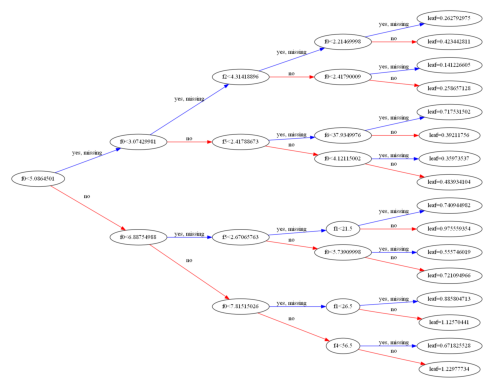

<Figure size 2000x1000 with 0 Axes>

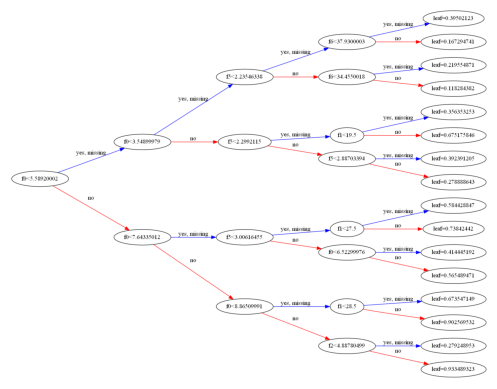

In [14]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, max_depth=4, random_state=42)
xgb_reg.fit(X_train, y_train)

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(xgb_reg, num_trees=0, rankdir='LR')
plt.show()

# Plot the second tree
plt.figure(figsize=(20, 10))
plot_tree(xgb_reg, num_trees=1, rankdir='LR')
plt.show()

<Figure size 1000x800 with 0 Axes>

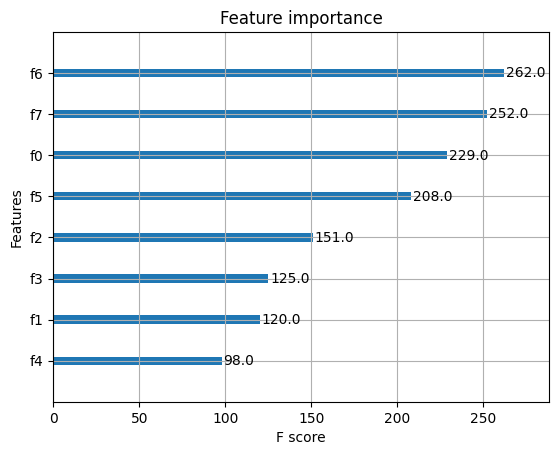

In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set parameters for the model
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'eval_metric': 'rmse'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(bst)
plt.show()